In [1]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
%run plotting.py

In [3]:
moon_polar_radius = 1736e3  # m

In [4]:
df = pd.read_csv("../../tudat-bundle/output/lro/lroPositionHourly.dat", names=["t", "x", "y", "z"], index_col="t")
df.index = pd.to_datetime(df.index, origin="julian", unit='D')
df["r"] = np.sqrt(df["x"]**2 + df["y"]**2 + df["z"]**2)
df

,x,y,z,r
t,,,,
2009-06-19 22:17:06.184322048,-2.415533e+08,-7.756510e+07,-4.847870e+07,2.582915e+08
2009-06-19 23:17:06.183745280,-2.396900e+08,-7.525729e+07,-4.825574e+07,2.558194e+08
2009-06-20 00:17:06.184013568,-2.378018e+08,-7.304541e+07,-4.801911e+07,2.533597e+08
2009-06-20 01:17:06.184322048,-2.358876e+08,-7.092389e+07,-4.776950e+07,2.509086e+08
2009-06-20 02:17:06.183745280,-2.339472e+08,-6.888754e+07,-4.750757e+07,2.484628e+08
...,...,...,...,...
2019-06-16 17:17:06.183745280,3.786930e+05,1.543133e+06,8.846678e+05,1.818600e+06
2019-06-16 18:17:06.184013568,-4.004884e+05,-1.684081e+06,-6.292888e+05,1.841880e+06
2019-06-16 19:17:06.184322048,3.951017e+05,1.662973e+06,6.043247e+05,1.812952e+06


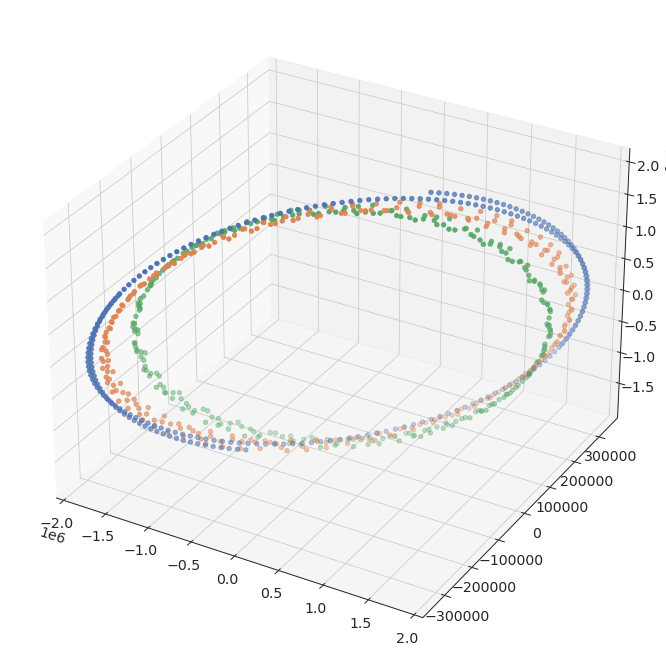

In [5]:
def plot_orbit_3d(df):
    def do_plot(df):
        ax.scatter3D(df["x"], df["y"], df["z"])
   
    fig = plt.figure(figsize=[12, 12])
    ax = fig.add_subplot(projection='3d')
    
    do_plot(df.loc["2009-07-10":"2009-07-20"])
    do_plot(df.loc["2009-10-10":"2009-10-20"])
    do_plot(df.loc["2010-12-10":"2010-12-20"])
    
plot_orbit_3d(df)

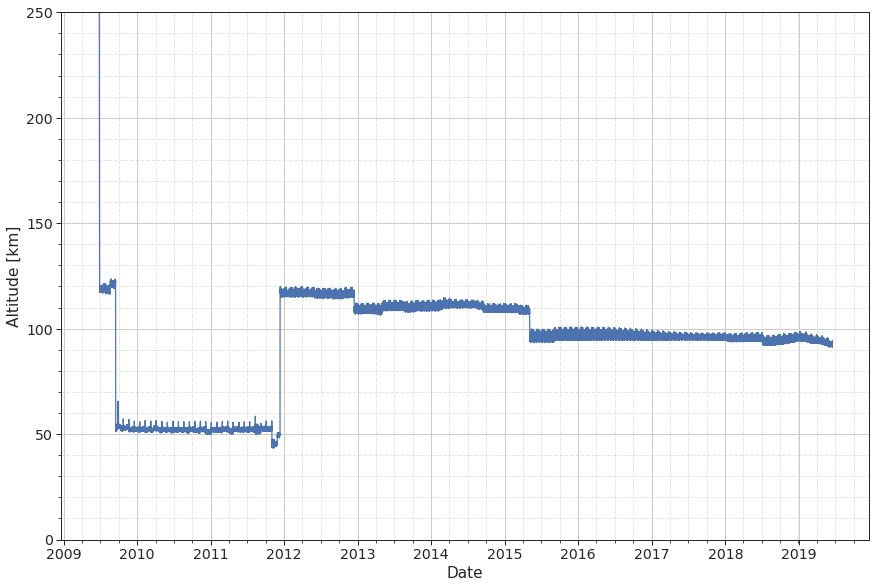

In [6]:
def plot_altitude(df):
    from datetime import datetime as dt
    
    plt.figure(figsize=[12, 8])
    plt.plot(df.index, (df["r"]-moon_polar_radius).rolling(10).mean() / 1e3)
    plt.ylabel("Altitude [km]")
    plt.xlabel("Date")
    plt.ylim([0, 250])
    # plt.xlim([dt(2009, 9, 1), dt(2009, 10, 1)])
    format_plot()

plot_altitude(df)